In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#for plotting
import seaborn as sns
import random as rnd
import matplotlib.pyplot as plt
#for ML
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,f1_score,precision_score, recall_score
#to save the model
import pickle

In [3]:
combine = pd.read_csv("~/Personal_proj/HeartAttackRisk/heart.csv")

In [4]:
combine.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [5]:
#using one hot encoding to split features with non binary labels into multiple features with single labels 

encoded_df = pd.get_dummies(combine, columns = ['ChestPainType' , 'RestingECG', 'ExerciseAngina', 'ST_Slope'])
print(encoded_df.head(10))

   Age Sex  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40   M        140          289          0    172      0.0             0   
1   49   F        160          180          0    156      1.0             1   
2   37   M        130          283          0     98      0.0             0   
3   48   F        138          214          0    108      1.5             1   
4   54   M        150          195          0    122      0.0             0   
5   39   M        120          339          0    170      0.0             0   
6   45   F        130          237          0    170      0.0             0   
7   54   M        110          208          0    142      0.0             0   
8   37   M        140          207          0    130      1.5             1   
9   48   F        120          284          0    120      0.0             0   

   ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0              False               True           

In [6]:
encoded_df = encoded_df.drop(columns = 'ExerciseAngina_N')


In [7]:
encoded_df.head(10)

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,M,140,289,0,172,0.0,0,False,True,False,False,False,True,False,False,False,False,True
1,49,F,160,180,0,156,1.0,1,False,False,True,False,False,True,False,False,False,True,False
2,37,M,130,283,0,98,0.0,0,False,True,False,False,False,False,True,False,False,False,True
3,48,F,138,214,0,108,1.5,1,True,False,False,False,False,True,False,True,False,True,False
4,54,M,150,195,0,122,0.0,0,False,False,True,False,False,True,False,False,False,False,True
5,39,M,120,339,0,170,0.0,0,False,False,True,False,False,True,False,False,False,False,True
6,45,F,130,237,0,170,0.0,0,False,True,False,False,False,True,False,False,False,False,True
7,54,M,110,208,0,142,0.0,0,False,True,False,False,False,True,False,False,False,False,True
8,37,M,140,207,0,130,1.5,1,True,False,False,False,False,True,False,True,False,True,False
9,48,F,120,284,0,120,0.0,0,False,True,False,False,False,True,False,False,False,False,True


In [8]:
#Now we look at the data to find the optimum points to split non boolean data in the features

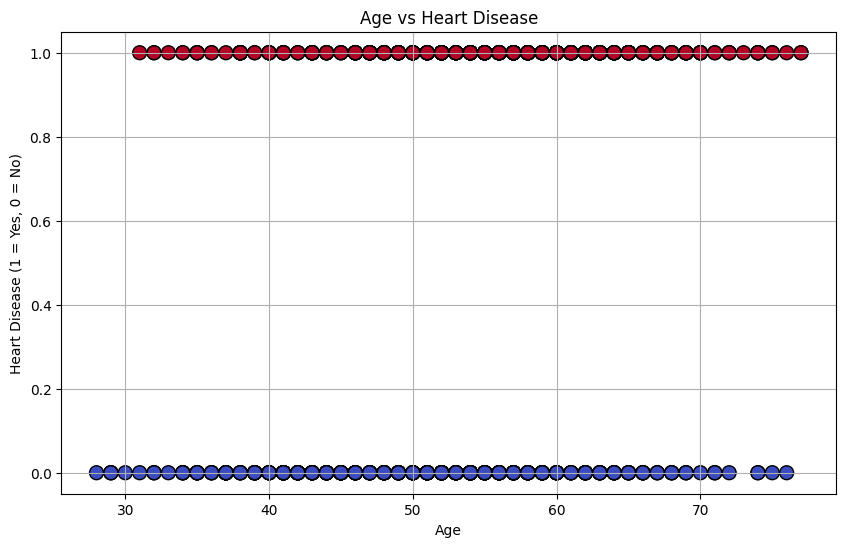

In [9]:
#analysing age
plt.figure(figsize=(10, 6))
plt.scatter(encoded_df['Age'], encoded_df['HeartDisease'], c=encoded_df['HeartDisease'], cmap='coolwarm', edgecolor='k', s=100)
plt.xlabel('Age')
plt.ylabel('Heart Disease (1 = Yes, 0 = No)')
plt.title('Age vs Heart Disease')
plt.grid(True)
plt.show()

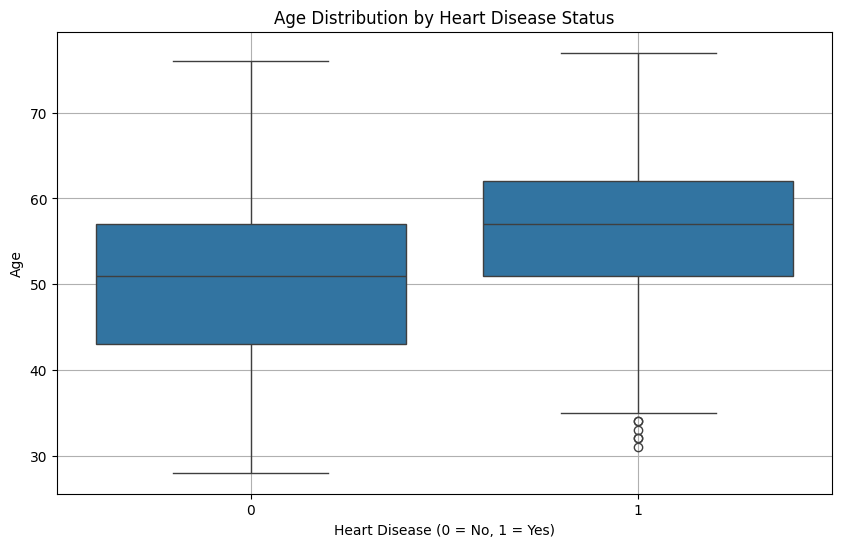

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='HeartDisease', y='Age', data=encoded_df)
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.title('Age Distribution by Heart Disease Status')
plt.grid(True)
plt.show()
# can infer that risk is highest in age group of 50-65

In [11]:
encoded_df = pd.get_dummies(encoded_df, columns = ['Sex'])
print(encoded_df.head(10))

   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172      0.0             0   
1   49        160          180          0    156      1.0             1   
2   37        130          283          0     98      0.0             0   
3   48        138          214          0    108      1.5             1   
4   54        150          195          0    122      0.0             0   
5   39        120          339          0    170      0.0             0   
6   45        130          237          0    170      0.0             0   
7   54        110          208          0    142      0.0             0   
8   37        140          207          0    130      1.5             1   
9   48        120          284          0    120      0.0             0   

   ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0              False               True              False             False   
1             

In [12]:
encoded_df.head(10)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Sex_F,Sex_M
0,40,140,289,0,172,0.0,0,False,True,False,False,False,True,False,False,False,False,True,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,False,True,False,False,False,True,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,False,False,False,True,False,False,False,True,False,True
3,48,138,214,0,108,1.5,1,True,False,False,False,False,True,False,True,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,False,True,False,False,True,False,False,False,False,True,False,True
5,39,120,339,0,170,0.0,0,False,False,True,False,False,True,False,False,False,False,True,False,True
6,45,130,237,0,170,0.0,0,False,True,False,False,False,True,False,False,False,False,True,True,False
7,54,110,208,0,142,0.0,0,False,True,False,False,False,True,False,False,False,False,True,False,True
8,37,140,207,0,130,1.5,1,True,False,False,False,False,True,False,True,False,True,False,False,True
9,48,120,284,0,120,0.0,0,False,True,False,False,False,True,False,False,False,False,True,True,False


In [13]:
encoded_df = encoded_df.drop(columns = 'Sex_M')#since the only options are male or female 
print(encoded_df.columns)

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'ChestPainType_ASY', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y',
       'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up', 'Sex_F'],
      dtype='object')


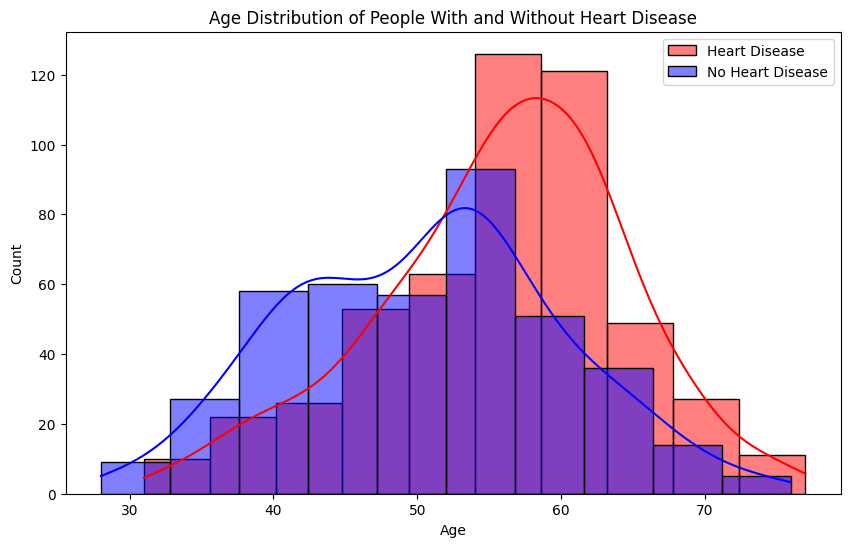

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(encoded_df[encoded_df['HeartDisease'] == 1]['Age'], kde=True, color='red', label='Heart Disease', bins=10)
sns.histplot(encoded_df[encoded_df['HeartDisease'] == 0]['Age'], kde=True, color='blue', label='No Heart Disease', bins=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of People With and Without Heart Disease')
plt.legend()
plt.show()

In [15]:
bins = [0, 25, 35, 45, 55,65,75, 100]  # Specify the range endpoints
labels = ['child', 'Young_Adult', 'Older_Adult','Middle_Aged','Y_Senior_Citizen','O_Senior_Citizen','Elderly']  # Labels for each range

# Use pd.cut to create a new column for groups
encoded_df['age_group'] = pd.cut(encoded_df['Age'], bins=bins, labels=labels, right=True)

# Display the updated DataFrame
print(encoded_df)

     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0     40        140          289          0    172      0.0             0   
1     49        160          180          0    156      1.0             1   
2     37        130          283          0     98      0.0             0   
3     48        138          214          0    108      1.5             1   
4     54        150          195          0    122      0.0             0   
..   ...        ...          ...        ...    ...      ...           ...   
913   45        110          264          0    132      1.2             1   
914   68        144          193          1    141      3.4             1   
915   57        130          131          0    115      1.2             1   
916   57        130          236          0    174      0.0             1   
917   38        138          175          0    173      0.0             0   

     ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  \
0          

In [16]:
encoded_df.head(10)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Sex_F,age_group
0,40,140,289,0,172,0.0,0,False,True,False,False,False,True,False,False,False,False,True,False,Older_Adult
1,49,160,180,0,156,1.0,1,False,False,True,False,False,True,False,False,False,True,False,True,Middle_Aged
2,37,130,283,0,98,0.0,0,False,True,False,False,False,False,True,False,False,False,True,False,Older_Adult
3,48,138,214,0,108,1.5,1,True,False,False,False,False,True,False,True,False,True,False,True,Middle_Aged
4,54,150,195,0,122,0.0,0,False,False,True,False,False,True,False,False,False,False,True,False,Middle_Aged
5,39,120,339,0,170,0.0,0,False,False,True,False,False,True,False,False,False,False,True,False,Older_Adult
6,45,130,237,0,170,0.0,0,False,True,False,False,False,True,False,False,False,False,True,True,Older_Adult
7,54,110,208,0,142,0.0,0,False,True,False,False,False,True,False,False,False,False,True,False,Middle_Aged
8,37,140,207,0,130,1.5,1,True,False,False,False,False,True,False,True,False,True,False,False,Older_Adult
9,48,120,284,0,120,0.0,0,False,True,False,False,False,True,False,False,False,False,True,True,Middle_Aged


In [17]:
encoded_df = pd.get_dummies(encoded_df, columns = ['age_group'])
encoded_df.head(10)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,ST_Slope_Flat,ST_Slope_Up,Sex_F,age_group_child,age_group_Young_Adult,age_group_Older_Adult,age_group_Middle_Aged,age_group_Y_Senior_Citizen,age_group_O_Senior_Citizen,age_group_Elderly
0,40,140,289,0,172,0.0,0,False,True,False,...,False,True,False,False,False,True,False,False,False,False
1,49,160,180,0,156,1.0,1,False,False,True,...,True,False,True,False,False,False,True,False,False,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,True,False,False,False,True,False,False,False,False
3,48,138,214,0,108,1.5,1,True,False,False,...,True,False,True,False,False,False,True,False,False,False
4,54,150,195,0,122,0.0,0,False,False,True,...,False,True,False,False,False,False,True,False,False,False
5,39,120,339,0,170,0.0,0,False,False,True,...,False,True,False,False,False,True,False,False,False,False
6,45,130,237,0,170,0.0,0,False,True,False,...,False,True,True,False,False,True,False,False,False,False
7,54,110,208,0,142,0.0,0,False,True,False,...,False,True,False,False,False,False,True,False,False,False
8,37,140,207,0,130,1.5,1,True,False,False,...,True,False,False,False,False,True,False,False,False,False
9,48,120,284,0,120,0.0,0,False,True,False,...,False,True,True,False,False,False,True,False,False,False


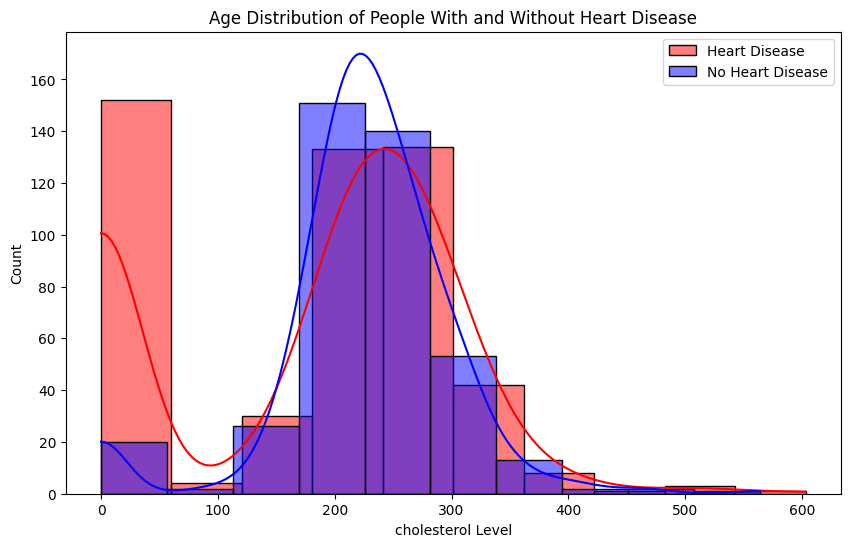

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(encoded_df[encoded_df['HeartDisease'] == 1]['Cholesterol'], kde=True, color='red', label='Heart Disease', bins=10)
sns.histplot(encoded_df[encoded_df['HeartDisease'] == 0]['Cholesterol'], kde=True, color='blue', label='No Heart Disease', bins=10)
plt.xlabel('cholesterol Level')
plt.ylabel('Count')
plt.title('Cholesterol Distribution of People With and Without Heart Disease')
plt.legend()
plt.show()

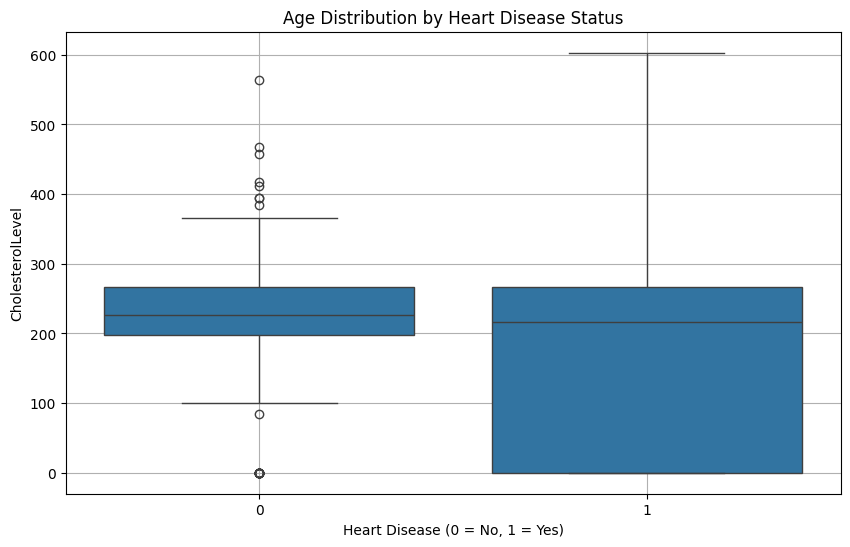

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='HeartDisease', y='Cholesterol', data=encoded_df)
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('CholesterolLevel')
plt.title('Age Distribution by Heart Disease Status')
plt.grid(True)
plt.show()


In [20]:
bins = [0, 100, 175,250,325, 400 , 600]  
labels = ['0-100', '100-175', '175-250', '25-325', '325-400' , '400-600'] 
encoded_df['Cholesterol'] = pd.cut(encoded_df['Cholesterol'], bins=bins, labels=labels, right=True)
print(encoded_df)

     Age  RestingBP Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0     40        140      25-325          0    172      0.0             0   
1     49        160     175-250          0    156      1.0             1   
2     37        130      25-325          0     98      0.0             0   
3     48        138     175-250          0    108      1.5             1   
4     54        150     175-250          0    122      0.0             0   
..   ...        ...         ...        ...    ...      ...           ...   
913   45        110      25-325          0    132      1.2             1   
914   68        144     175-250          1    141      3.4             1   
915   57        130     100-175          0    115      1.2             1   
916   57        130     175-250          0    174      0.0             1   
917   38        138     100-175          0    173      0.0             0   

     ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  ...  \
0                F

In [21]:
encoded_df.head(10)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,ST_Slope_Flat,ST_Slope_Up,Sex_F,age_group_child,age_group_Young_Adult,age_group_Older_Adult,age_group_Middle_Aged,age_group_Y_Senior_Citizen,age_group_O_Senior_Citizen,age_group_Elderly
0,40,140,25-325,0,172,0.0,0,False,True,False,...,False,True,False,False,False,True,False,False,False,False
1,49,160,175-250,0,156,1.0,1,False,False,True,...,True,False,True,False,False,False,True,False,False,False
2,37,130,25-325,0,98,0.0,0,False,True,False,...,False,True,False,False,False,True,False,False,False,False
3,48,138,175-250,0,108,1.5,1,True,False,False,...,True,False,True,False,False,False,True,False,False,False
4,54,150,175-250,0,122,0.0,0,False,False,True,...,False,True,False,False,False,False,True,False,False,False
5,39,120,325-400,0,170,0.0,0,False,False,True,...,False,True,False,False,False,True,False,False,False,False
6,45,130,175-250,0,170,0.0,0,False,True,False,...,False,True,True,False,False,True,False,False,False,False
7,54,110,175-250,0,142,0.0,0,False,True,False,...,False,True,False,False,False,False,True,False,False,False
8,37,140,175-250,0,130,1.5,1,True,False,False,...,True,False,False,False,False,True,False,False,False,False
9,48,120,25-325,0,120,0.0,0,False,True,False,...,False,True,True,False,False,False,True,False,False,False


In [22]:
#since there are NaNs caused by the data values >600
heart_disease_df = combine[combine['HeartDisease'] == 1]
median_cholesterol = heart_disease_df['Cholesterol'].median()
print (median_cholesterol)

217.0


In [23]:
na_columns = encoded_df.isna().any()
print (na_columns)

Age                           False
RestingBP                     False
Cholesterol                    True
FastingBS                     False
MaxHR                         False
Oldpeak                       False
HeartDisease                  False
ChestPainType_ASY             False
ChestPainType_ATA             False
ChestPainType_NAP             False
ChestPainType_TA              False
RestingECG_LVH                False
RestingECG_Normal             False
RestingECG_ST                 False
ExerciseAngina_Y              False
ST_Slope_Down                 False
ST_Slope_Flat                 False
ST_Slope_Up                   False
Sex_F                         False
age_group_child               False
age_group_Young_Adult         False
age_group_Older_Adult         False
age_group_Middle_Aged         False
age_group_Y_Senior_Citizen    False
age_group_O_Senior_Citizen    False
age_group_Elderly             False
dtype: bool


In [24]:
na_counts = encoded_df.isna().sum()
print(na_counts)

Age                             0
RestingBP                       0
Cholesterol                   173
FastingBS                       0
MaxHR                           0
Oldpeak                         0
HeartDisease                    0
ChestPainType_ASY               0
ChestPainType_ATA               0
ChestPainType_NAP               0
ChestPainType_TA                0
RestingECG_LVH                  0
RestingECG_Normal               0
RestingECG_ST                   0
ExerciseAngina_Y                0
ST_Slope_Down                   0
ST_Slope_Flat                   0
ST_Slope_Up                     0
Sex_F                           0
age_group_child                 0
age_group_Young_Adult           0
age_group_Older_Adult           0
age_group_Middle_Aged           0
age_group_Y_Senior_Citizen      0
age_group_O_Senior_Citizen      0
age_group_Elderly               0
dtype: int64


In [25]:
encoded_df.loc[encoded_df['HeartDisease']==1, ['Cholesterol']] = encoded_df.loc[encoded_df['HeartDisease'] ==True, ['Cholesterol']].fillna('400-600')
encoded_df.head(10)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,ST_Slope_Flat,ST_Slope_Up,Sex_F,age_group_child,age_group_Young_Adult,age_group_Older_Adult,age_group_Middle_Aged,age_group_Y_Senior_Citizen,age_group_O_Senior_Citizen,age_group_Elderly
0,40,140,25-325,0,172,0.0,0,False,True,False,...,False,True,False,False,False,True,False,False,False,False
1,49,160,175-250,0,156,1.0,1,False,False,True,...,True,False,True,False,False,False,True,False,False,False
2,37,130,25-325,0,98,0.0,0,False,True,False,...,False,True,False,False,False,True,False,False,False,False
3,48,138,175-250,0,108,1.5,1,True,False,False,...,True,False,True,False,False,False,True,False,False,False
4,54,150,175-250,0,122,0.0,0,False,False,True,...,False,True,False,False,False,False,True,False,False,False
5,39,120,325-400,0,170,0.0,0,False,False,True,...,False,True,False,False,False,True,False,False,False,False
6,45,130,175-250,0,170,0.0,0,False,True,False,...,False,True,True,False,False,True,False,False,False,False
7,54,110,175-250,0,142,0.0,0,False,True,False,...,False,True,False,False,False,False,True,False,False,False
8,37,140,175-250,0,130,1.5,1,True,False,False,...,True,False,False,False,False,True,False,False,False,False
9,48,120,25-325,0,120,0.0,0,False,True,False,...,False,True,True,False,False,False,True,False,False,False


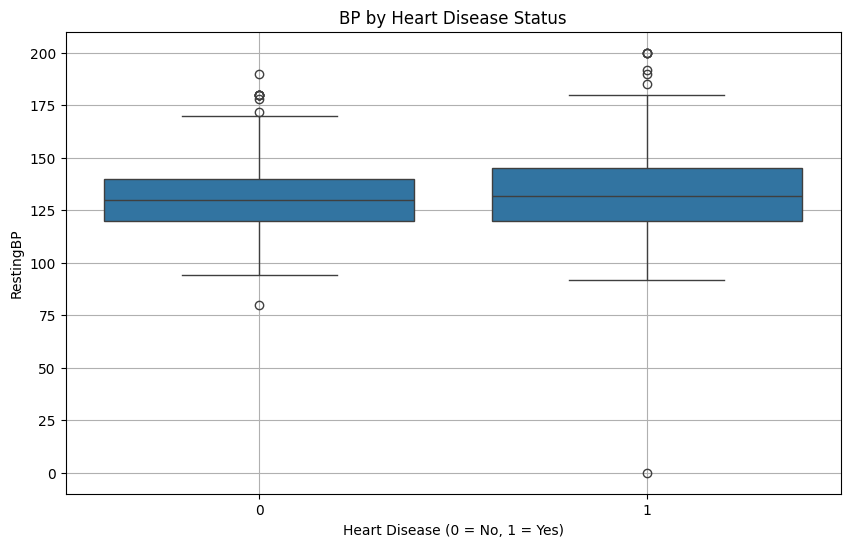

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='HeartDisease', y='RestingBP', data=encoded_df)
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('RestingBP')
plt.title('BP by Heart Disease Status')
plt.grid(True)
plt.show()


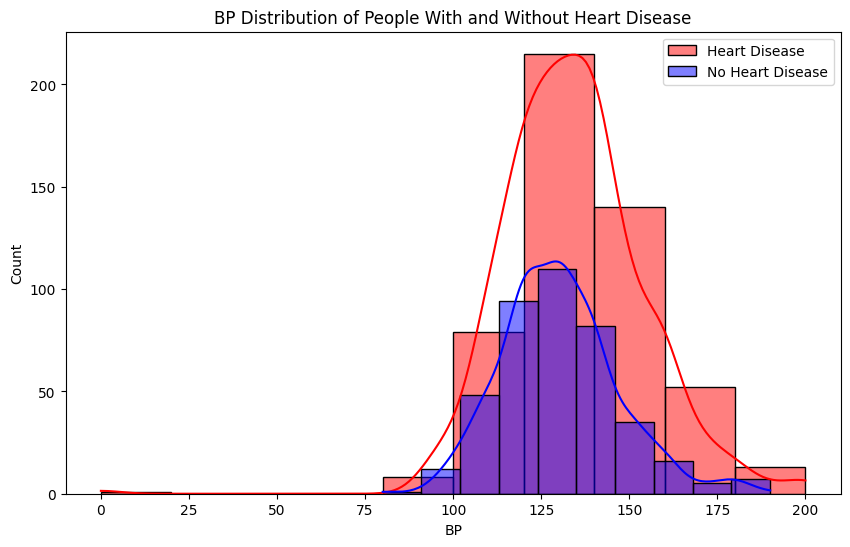

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(encoded_df[encoded_df['HeartDisease'] == 1]['RestingBP'], kde=True, color='red', label='Heart Disease', bins=10)
sns.histplot(encoded_df[encoded_df['HeartDisease'] == 0]['RestingBP'], kde=True, color='blue', label='No Heart Disease', bins=10)
plt.xlabel('BP')
plt.ylabel('Count')
plt.title('BP Distribution of People With and Without Heart Disease')
plt.legend()
plt.show()

In [28]:
bins = [0, 100, 125,150,175, 200 ]  # Specify the range endpoints
labels = ['0-100', '100-125', '125-150', '150-175', '175+']  # Labels for each range

# Use pd.cut to create a new column for  groups
encoded_df['RestingBP'] = pd.cut(encoded_df['RestingBP'], bins=bins, labels=labels, right=True)

# Display the updated DataFrame
print(encoded_df)

     Age RestingBP Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0     40   125-150      25-325          0    172      0.0             0   
1     49   150-175     175-250          0    156      1.0             1   
2     37   125-150      25-325          0     98      0.0             0   
3     48   125-150     175-250          0    108      1.5             1   
4     54   125-150     175-250          0    122      0.0             0   
..   ...       ...         ...        ...    ...      ...           ...   
913   45   100-125      25-325          0    132      1.2             1   
914   68   125-150     175-250          1    141      3.4             1   
915   57   125-150     100-175          0    115      1.2             1   
916   57   125-150     175-250          0    174      0.0             1   
917   38   125-150     100-175          0    173      0.0             0   

     ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  ...  \
0                False        

In [29]:
encoded_df = pd.get_dummies(encoded_df, columns=['Cholesterol' , 'RestingBP'], drop_first=False)

In [30]:
encoded_df.head(10)

,Age,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,...,Cholesterol_100-175,Cholesterol_175-250,Cholesterol_25-325,Cholesterol_325-400,Cholesterol_400-600,RestingBP_0-100,RestingBP_100-125,RestingBP_125-150,RestingBP_150-175,RestingBP_175+
0,40,0,172,0.0,0,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
1,49,0,156,1.0,1,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
2,37,0,98,0.0,0,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
3,48,0,108,1.5,1,True,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
4,54,0,122,0.0,0,False,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
5,39,0,170,0.0,0,False,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False
6,45,0,170,0.0,0,False,True,False,False,False,...,False,True,False,False,False,False,False,True,False,False
7,54,0,142,0.0,0,False,True,False,False,False,...,False,True,False,False,False,False,True,False,False,False
8,37,0,130,1.5,1,True,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
9,48,0,120,0.0,0,False,True,False,False,False,...,False,False,True,False,False,False,True,False,False,False


In [31]:
print(max(encoded_df['FastingBS']) , min(encoded_df['FastingBS']))

1 0


In [32]:
encoded_df.columns

Index(['Age', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease',
       'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal',
       'RestingECG_ST', 'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat',
       'ST_Slope_Up', 'Sex_F', 'age_group_child', 'age_group_Young_Adult',
       'age_group_Older_Adult', 'age_group_Middle_Aged',
       'age_group_Y_Senior_Citizen', 'age_group_O_Senior_Citizen',
       'age_group_Elderly', 'Cholesterol_0-100', 'Cholesterol_100-175',
       'Cholesterol_175-250', 'Cholesterol_25-325', 'Cholesterol_325-400',
       'Cholesterol_400-600', 'RestingBP_0-100', 'RestingBP_100-125',
       'RestingBP_125-150', 'RestingBP_150-175', 'RestingBP_175+'],
      dtype='object')

In [33]:
encoded_df = encoded_df.drop(columns ='Age')
encoded_df.columns

Index(['FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up',
       'Sex_F', 'age_group_child', 'age_group_Young_Adult',
       'age_group_Older_Adult', 'age_group_Middle_Aged',
       'age_group_Y_Senior_Citizen', 'age_group_O_Senior_Citizen',
       'age_group_Elderly', 'Cholesterol_0-100', 'Cholesterol_100-175',
       'Cholesterol_175-250', 'Cholesterol_25-325', 'Cholesterol_325-400',
       'Cholesterol_400-600', 'RestingBP_0-100', 'RestingBP_100-125',
       'RestingBP_125-150', 'RestingBP_150-175', 'RestingBP_175+'],
      dtype='object')

In [34]:
encoded_df = encoded_df.rename(columns={'Cholesterol_25-325' :'Cholesterol_250-325' })
encoded_df.columns

Index(['FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up',
       'Sex_F', 'age_group_child', 'age_group_Young_Adult',
       'age_group_Older_Adult', 'age_group_Middle_Aged',
       'age_group_Y_Senior_Citizen', 'age_group_O_Senior_Citizen',
       'age_group_Elderly', 'Cholesterol_0-100', 'Cholesterol_100-175',
       'Cholesterol_175-250', 'Cholesterol_250-325', 'Cholesterol_325-400',
       'Cholesterol_400-600', 'RestingBP_0-100', 'RestingBP_100-125',
       'RestingBP_125-150', 'RestingBP_150-175', 'RestingBP_175+'],
      dtype='object')

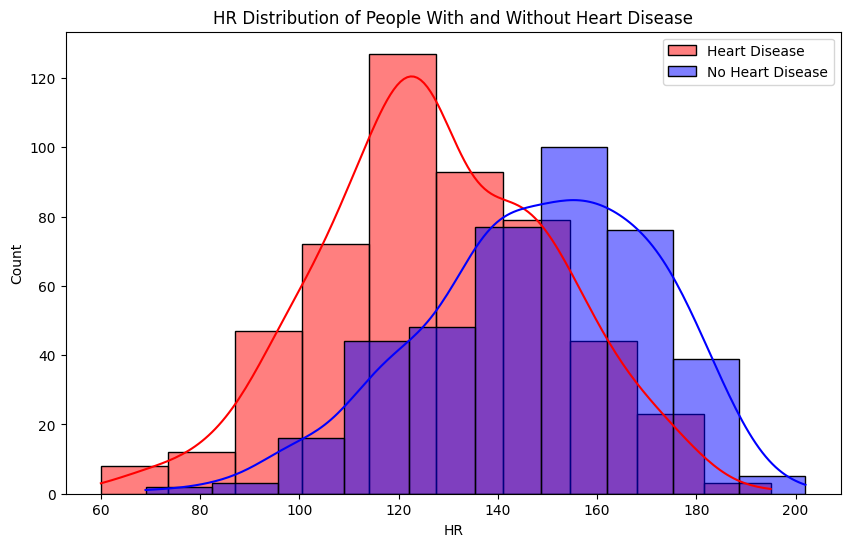

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(encoded_df[encoded_df['HeartDisease'] == 1]['MaxHR'], kde=True, color='red', label='Heart Disease', bins=10)
sns.histplot(encoded_df[encoded_df['HeartDisease'] == 0]['MaxHR'], kde=True, color='blue', label='No Heart Disease', bins=10)
plt.xlabel('HR')
plt.ylabel('Count')
plt.title('HR Distribution of People With and Without Heart Disease')
plt.legend()
plt.show()

In [36]:
bins = [0, 70,90 ,110,130, 150,170,200 ]  # Specify the range endpoints
labels = ['0-70','70-90', '90-110', '110-130', '130-150', '150-170','170+']  # Labels for each range

# Use pd.cut to create a new column for  groups
encoded_df['MaxHR'] = pd.cut(encoded_df['MaxHR'], bins=bins, labels=labels, right=True)

# Display the updated DataFrame
print(encoded_df)

     FastingBS    MaxHR  Oldpeak  HeartDisease  ChestPainType_ASY  \
0            0     170+      0.0             0              False   
1            0  150-170      1.0             1              False   
2            0   90-110      0.0             0              False   
3            0   90-110      1.5             1               True   
4            0  110-130      0.0             0              False   
..         ...      ...      ...           ...                ...   
913          0  130-150      1.2             1              False   
914          1  130-150      3.4             1               True   
915          0  110-130      1.2             1               True   
916          0     170+      0.0             1              False   
917          0     170+      0.0             0              False   

     ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  RestingECG_LVH  \
0                 True              False             False           False   
1            

In [37]:
encoded_df = pd.get_dummies(encoded_df, columns=['MaxHR'], drop_first=False)
encoded_df.head(10)

,FastingBS,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,...,RestingBP_125-150,RestingBP_150-175,RestingBP_175+,MaxHR_0-70,MaxHR_70-90,MaxHR_90-110,MaxHR_110-130,MaxHR_130-150,MaxHR_150-170,MaxHR_170+
0,0,0.0,0,False,True,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,True
1,0,1.0,1,False,False,True,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
2,0,0.0,0,False,True,False,False,False,False,True,...,True,False,False,False,False,True,False,False,False,False
3,0,1.5,1,True,False,False,False,False,True,False,...,True,False,False,False,False,True,False,False,False,False
4,0,0.0,0,False,False,True,False,False,True,False,...,True,False,False,False,False,False,True,False,False,False
5,0,0.0,0,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
6,0,0.0,0,False,True,False,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
7,0,0.0,0,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
8,0,1.5,1,True,False,False,False,False,True,False,...,True,False,False,False,False,False,True,False,False,False
9,0,0.0,0,False,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False


In [38]:
encoded_df.columns


Index(['FastingBS', 'Oldpeak', 'HeartDisease', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up',
       'Sex_F', 'age_group_child', 'age_group_Young_Adult',
       'age_group_Older_Adult', 'age_group_Middle_Aged',
       'age_group_Y_Senior_Citizen', 'age_group_O_Senior_Citizen',
       'age_group_Elderly', 'Cholesterol_0-100', 'Cholesterol_100-175',
       'Cholesterol_175-250', 'Cholesterol_250-325', 'Cholesterol_325-400',
       'Cholesterol_400-600', 'RestingBP_0-100', 'RestingBP_100-125',
       'RestingBP_125-150', 'RestingBP_150-175', 'RestingBP_175+',
       'MaxHR_0-70', 'MaxHR_70-90', 'MaxHR_90-110', 'MaxHR_110-130',
       'MaxHR_130-150', 'MaxHR_150-170', 'MaxHR_170+'],
      dtype='object')

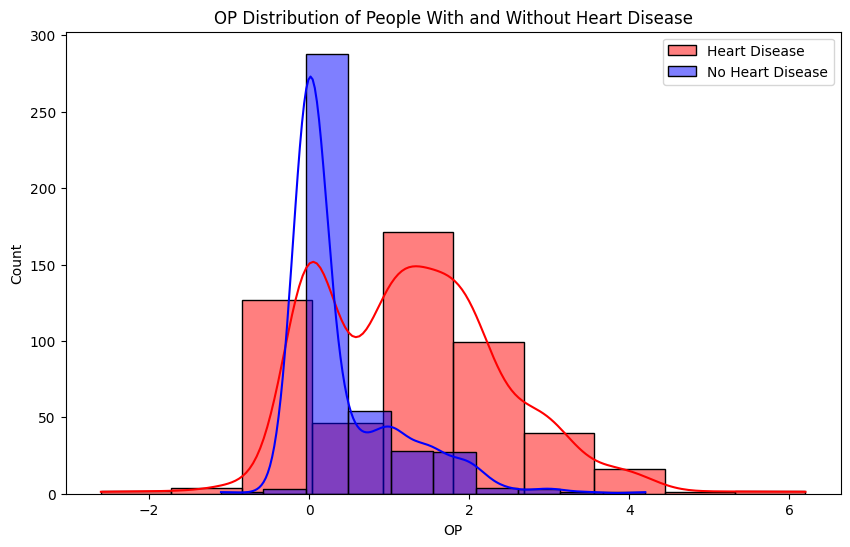

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(encoded_df[encoded_df['HeartDisease'] == 1]['Oldpeak'], kde=True, color='red', label='Heart Disease', bins=10)
sns.histplot(encoded_df[encoded_df['HeartDisease'] == 0]['Oldpeak'], kde=True, color='blue', label='No Heart Disease', bins=10)
plt.xlabel('OP')
plt.ylabel('Count')
plt.title('OP Distribution of People With and Without Heart Disease')
plt.legend()
plt.show()

In [40]:
modified_OP = abs(encoded_df['Oldpeak'])
print (modified_OP)

0      0.0
1      1.0
2      0.0
3      1.5
4      0.0
      ... 
913    1.2
914    3.4
915    1.2
916    0.0
917    0.0
Name: Oldpeak, Length: 918, dtype: float64


In [41]:
encoded_df['AbsOP'] = encoded_df['Oldpeak'].abs()
encoded_df.head()


,FastingBS,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,...,RestingBP_150-175,RestingBP_175+,MaxHR_0-70,MaxHR_70-90,MaxHR_90-110,MaxHR_110-130,MaxHR_130-150,MaxHR_150-170,MaxHR_170+,AbsOP
0,0,0.0,0,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,0.0
1,0,1.0,1,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,True,False,1.0
2,0,0.0,0,False,True,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,0.0
3,0,1.5,1,True,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,1.5
4,0,0.0,0,False,False,True,False,False,True,False,...,False,False,False,False,False,True,False,False,False,0.0


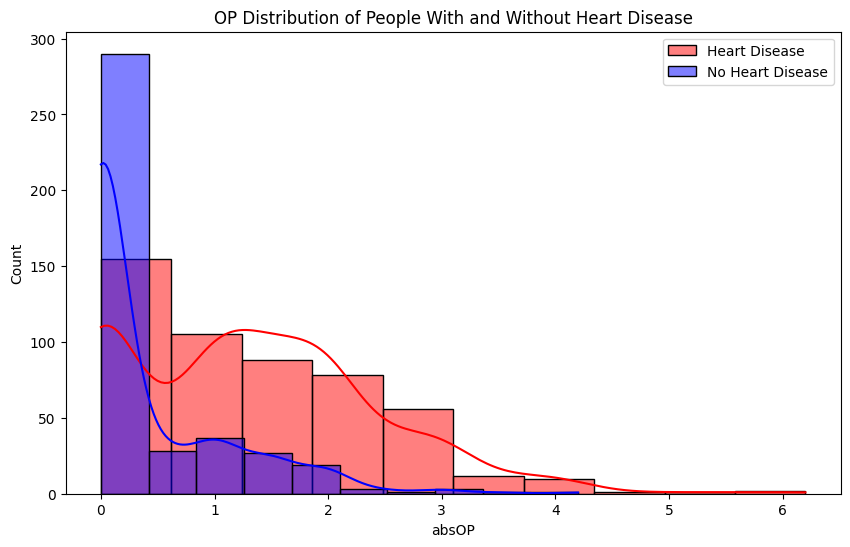

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(encoded_df[encoded_df['HeartDisease'] == 1]['AbsOP'], kde=True, color='red', label='Heart Disease', bins=10)
sns.histplot(encoded_df[encoded_df['HeartDisease'] == 0]['AbsOP'], kde=True, color='blue', label='No Heart Disease', bins=10)
plt.xlabel('absOP')
plt.ylabel('Count')
plt.title('OP Distribution of People With and Without Heart Disease')
plt.legend()
plt.show()

In [43]:
encoded_df = encoded_df.drop(columns = ['AbsOP'])
print(encoded_df.columns)

Index(['FastingBS', 'Oldpeak', 'HeartDisease', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up',
       'Sex_F', 'age_group_child', 'age_group_Young_Adult',
       'age_group_Older_Adult', 'age_group_Middle_Aged',
       'age_group_Y_Senior_Citizen', 'age_group_O_Senior_Citizen',
       'age_group_Elderly', 'Cholesterol_0-100', 'Cholesterol_100-175',
       'Cholesterol_175-250', 'Cholesterol_250-325', 'Cholesterol_325-400',
       'Cholesterol_400-600', 'RestingBP_0-100', 'RestingBP_100-125',
       'RestingBP_125-150', 'RestingBP_150-175', 'RestingBP_175+',
       'MaxHR_0-70', 'MaxHR_70-90', 'MaxHR_90-110', 'MaxHR_110-130',
       'MaxHR_130-150', 'MaxHR_150-170', 'MaxHR_170+'],
      dtype='object')


In [44]:
bins = [-3,-0.75,0 ,0.75,1.5,2.25,3,4,7 ]  # Specify the range endpoints
labels = ['<-0.75','-0.75-0', '0-0.75', '0.75-1.5', '1.5-2.25', '2.25-3','3-4','4+']  # Labels for each range

# Use pd.cut to create a new column for  groups
encoded_df['Oldpeak'] = pd.cut(encoded_df['Oldpeak'], bins=bins, labels=labels, right=True)

# Display the updated DataFrame
print(encoded_df)

     FastingBS   Oldpeak  HeartDisease  ChestPainType_ASY  ChestPainType_ATA  \
0            0   -0.75-0             0              False               True   
1            0  0.75-1.5             1              False              False   
2            0   -0.75-0             0              False               True   
3            0  0.75-1.5             1               True              False   
4            0   -0.75-0             0              False              False   
..         ...       ...           ...                ...                ...   
913          0  0.75-1.5             1              False              False   
914          1       3-4             1               True              False   
915          0  0.75-1.5             1               True              False   
916          0   -0.75-0             1              False               True   
917          0   -0.75-0             0              False              False   

     ChestPainType_NAP  ChestPainType_T

In [45]:
encoded_df = pd.get_dummies(encoded_df, columns=['Oldpeak'], drop_first=False)
encoded_df.head(10)

,FastingBS,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,...,MaxHR_150-170,MaxHR_170+,Oldpeak_<-0.75,Oldpeak_-0.75-0,Oldpeak_0-0.75,Oldpeak_0.75-1.5,Oldpeak_1.5-2.25,Oldpeak_2.25-3,Oldpeak_3-4,Oldpeak_4+
0,0,0,False,True,False,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,False
1,0,1,False,False,True,False,False,True,False,False,...,True,False,False,False,False,True,False,False,False,False
2,0,0,False,True,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
3,0,1,True,False,False,False,False,True,False,True,...,False,False,False,False,False,True,False,False,False,False
4,0,0,False,False,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
5,0,0,False,False,True,False,False,True,False,False,...,True,False,False,True,False,False,False,False,False,False
6,0,0,False,True,False,False,False,True,False,False,...,True,False,False,True,False,False,False,False,False,False
7,0,0,False,True,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
8,0,1,True,False,False,False,False,True,False,True,...,False,False,False,False,False,True,False,False,False,False
9,0,0,False,True,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False


In [46]:
training_df = encoded_df.sample(frac=0.8, random_state=42)  # 80% training
testing_df = encoded_df.drop(training_df.index)  # 20% testing
training_df.columns 
print(training_df.shape[0])
print(testing_df.shape[0])
print(encoded_df.shape[0])

734
184
918


In [47]:
training_df.head(10)


,FastingBS,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,...,MaxHR_150-170,MaxHR_170+,Oldpeak_<-0.75,Oldpeak_-0.75-0,Oldpeak_0-0.75,Oldpeak_0.75-1.5,Oldpeak_1.5-2.25,Oldpeak_2.25-3,Oldpeak_3-4,Oldpeak_4+
668,0,0,False,True,False,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,False
30,0,1,False,False,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
377,1,1,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
535,0,1,True,False,False,False,True,False,False,True,...,False,False,False,False,False,True,False,False,False,False
807,0,0,False,True,False,False,False,True,False,False,...,True,False,False,True,False,False,False,False,False,False
793,1,1,True,False,False,False,False,True,False,False,...,True,False,False,False,True,False,False,False,False,False
363,0,1,True,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
583,0,0,False,False,True,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
165,1,1,False,False,False,True,False,True,False,False,...,False,True,False,False,False,False,True,False,False,False
483,0,1,True,False,False,False,True,False,False,True,...,False,False,False,False,False,True,False,False,False,False


In [48]:
testing_df.head(10)

,FastingBS,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,...,MaxHR_150-170,MaxHR_170+,Oldpeak_<-0.75,Oldpeak_-0.75-0,Oldpeak_0-0.75,Oldpeak_0.75-1.5,Oldpeak_1.5-2.25,Oldpeak_2.25-3,Oldpeak_3-4,Oldpeak_4+
1,0,1,False,False,True,False,False,True,False,False,...,True,False,False,False,False,True,False,False,False,False
4,0,0,False,False,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
13,0,1,True,False,False,False,False,True,False,True,...,False,False,False,False,False,True,False,False,False,False
14,0,0,False,False,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
20,0,0,False,False,False,True,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
21,0,0,False,True,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
27,0,0,False,True,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
32,0,1,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
34,0,0,False,True,False,False,False,True,False,False,...,True,False,False,True,False,False,False,False,False,False
35,0,0,False,True,False,False,False,True,False,False,...,True,False,False,True,False,False,False,False,False,False


In [49]:
X = encoded_df.drop('HeartDisease', axis=1)  # Replace 'target_column' with actual column name
y = encoded_df['HeartDisease']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape[0] , X_test.shape[0] , y_train.shape[0] , y_test.shape[0])

734 184 734 184


In [50]:
clf_RFC = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf_RFC.fit(X_train, y_train)

# Predict on the test set
y_pred = clf_RFC.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 87.50%
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        77
           1       0.92      0.86      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



In [51]:
clf_LR = LogisticRegression()
clf_LR.fit(X_train,y_train)
y_pred = clf_LR.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8804347826086957


In [52]:
svc_model = SVC(kernel='rbf')  

# Fit the model on the training data
svc_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svc = svc_model.predict(X_test)

# Evaluate the model's accuracy
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("SVC Accuracy:", accuracy_svc)

# Classification report
report_svc = classification_report(y_test, y_pred_svc)
print("SVC Classification Report:\n", report_svc)


SVC Accuracy: 0.8967391304347826
SVC Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88        77
           1       0.92      0.90      0.91       107

    accuracy                           0.90       184
   macro avg       0.89      0.90      0.89       184
weighted avg       0.90      0.90      0.90       184



In [53]:
# Initialize and fit the LinearSVC model
linear_model = LinearSVC()

# Fit the model on the training data
linear_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model's accuracy
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("LinearSVC Accuracy:", accuracy_linear)

# Classification report
report_linear = classification_report(y_test, y_pred_linear)
print("LinearSVC Classification Report:\n", report_linear)

LinearSVC Accuracy: 0.8695652173913043
LinearSVC Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



/home/kedarathrey/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [54]:
CLF_KNN = KNeighborsClassifier()
CLF_KNN.fit(X_train,y_train)
y_pred = CLF_KNN.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(accuracy)
print(f"KNN Classification Report:\n{classification_report(y_test, y_pred)}")


0.8586956521739131
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.84        77
           1       0.93      0.82      0.87       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184



In [55]:
CLF_GNB = GaussianNB()
CLF_GNB.fit(X_train,y_train)
y_pred = CLF_GNB.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(accuracy)
print(f"GNB Classification Report:\n{classification_report(y_test, y_pred)}")

0.7010869565217391
GNB Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.88      0.71        77
           1       0.87      0.57      0.69       107

    accuracy                           0.70       184
   macro avg       0.73      0.73      0.70       184
weighted avg       0.76      0.70      0.70       184



In [56]:
CLF_PER = Perceptron(max_iter = 1000 , random_state = 42)
CLF_PER.fit(X_train,y_train)
y_pred = CLF_PER.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(accuracy)
print(f"PER Classification Report:\n{classification_report(y_test, y_pred)}")

0.842391304347826
PER Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.81        77
           1       0.85      0.89      0.87       107

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.84       184
weighted avg       0.84      0.84      0.84       184



In [57]:
CLF_SDG = SGDClassifier(max_iter=1000, tol = 1e-3, random_state =42)
CLF_SDG.fit(X_train,y_train)
y_pred = CLF_SDG.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(accuracy)
print(f"SDG Classification Report:\n{classification_report(y_test, y_pred)}")

0.8478260869565217
SDG Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        77
           1       0.90      0.83      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [58]:
CLF_DTC = DecisionTreeClassifier(random_state=42)
CLF_DTC.fit(X_train,y_train)
y_pred = CLF_DTC.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(accuracy)
print(f"DTC Classification Report:\n{classification_report(y_test, y_pred)}")

0.7989130434782609
DTC Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.87      0.78        77
           1       0.89      0.75      0.81       107

    accuracy                           0.80       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.82      0.80      0.80       184



In [59]:
# can infer that best model is SVC with rbf kernel
#to save the model, I want to save it using probabilities instead of binary values
model = SVC(kernel='rbf', probability=True)
model.fit(X_train, y_train)



SVC(probability=True)

In [61]:
import joblib
# Save the model
joblib.dump(model, 'svm_heartrisk.joblib')

['svm_heartrisk.joblib']

In [63]:
training_df.head(10)

,FastingBS,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,...,MaxHR_150-170,MaxHR_170+,Oldpeak_<-0.75,Oldpeak_-0.75-0,Oldpeak_0-0.75,Oldpeak_0.75-1.5,Oldpeak_1.5-2.25,Oldpeak_2.25-3,Oldpeak_3-4,Oldpeak_4+
668,0,0,False,True,False,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,False
30,0,1,False,False,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
377,1,1,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
535,0,1,True,False,False,False,True,False,False,True,...,False,False,False,False,False,True,False,False,False,False
807,0,0,False,True,False,False,False,True,False,False,...,True,False,False,True,False,False,False,False,False,False
793,1,1,True,False,False,False,False,True,False,False,...,True,False,False,False,True,False,False,False,False,False
363,0,1,True,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
583,0,0,False,False,True,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
165,1,1,False,False,False,True,False,True,False,False,...,False,True,False,False,False,False,True,False,False,False
483,0,1,True,False,False,False,True,False,False,True,...,False,False,False,False,False,True,False,False,False,False


Index(['FastingBS', 'ChestPainType_ASY', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y',
       'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up', 'Sex_F',
       'age_group_child', 'age_group_Young_Adult', 'age_group_Older_Adult',
       'age_group_Middle_Aged', 'age_group_Y_Senior_Citizen',
       'age_group_O_Senior_Citizen', 'age_group_Elderly', 'Cholesterol_0-100',
       'Cholesterol_100-175', 'Cholesterol_175-250', 'Cholesterol_250-325',
       'Cholesterol_325-400', 'Cholesterol_400-600', 'RestingBP_0-100',
       'RestingBP_100-125', 'RestingBP_125-150', 'RestingBP_150-175',
       'RestingBP_175+', 'MaxHR_0-70', 'MaxHR_70-90', 'MaxHR_90-110',
       'MaxHR_110-130', 'MaxHR_130-150', 'MaxHR_150-170', 'MaxHR_170+',
       'Oldpeak_<-0.75', 'Oldpeak_-0.75-0', 'Oldpeak_0-0.75',
       'Oldpeak_0.75-1.5', 'Oldpeak_1.5-2.25', 'Oldpeak_2.25-3', 'Oldpeak_3-4',
       'Oldpeak_4+'],
 